In [1]:
#페이지3
#3-1 : csv파일 불러오기
import pandas as pd
uk=pd.io.parsers.read_csv("Connections_UK.csv")
print(uk)

        Metric                 Market, Operator       Q1 2010       Q2 2010  \
0  Connections                 3 (CK Hutchison)    5,055,187     5,127,360    
1  Connections                          EE (BT)   17,175,000    27,093,000    
2  Connections                         Vodafone   19,954,383    19,965,191    
3  Connections                  O2 (Telefónica)   21,355,500    21,605,600    
4  Connections         Orange  (Merged Q2 2010)   16,442,000            NaN   
5  Connections  Relish Broadband (UK Broadband)           NaN           NaN   
6  Connections                   United Kingdom   79,982,070    73,791,151    

        Q3 2010       Q4 2010       Q1 2011       Q2 2011       Q3 2011  \
0    5,352,510     5,577,660     5,652,029     5,726,398     6,083,239    
1   27,101,000    27,214,000    26,978,000    26,803,000    26,762,000    
2   20,264,690    20,602,194    20,663,541    20,579,131    20,950,441    
3   21,957,100    22,211,500    22,286,400    22,142,600    22,213,

In [2]:
#3-2 : xlsx 파일 불러오기
import pandas as pd
market=pd.ExcelFile("FranceMarketData.xlsx")
fm=market.parse('Sheet1', index_col=None, na_values=['NA'])
print(fm)

                                Metric Attribute     Market, Operator  \
0  Connections, including cellular M2M       NaN                  NaN   
1  Connections, including cellular M2M     Total     Bouygues Telecom   
2  Connections, including cellular M2M     Total         SFR (Altice)   
3  Connections, including cellular M2M     Total               Orange   
4  Connections, including cellular M2M     Total  Free Mobile (Iliad)   

                           Unnamed: 3                          Unnamed: 4  \
0  Connections including Cellular M2M  Connections excluding Cellular M2M   
1                            16207697                            11864712   
2                            31005487                            24988692   
3                            38747161                            20658604   
4                            13844000                            13844000   

               Unnamed: 5  
0  Smartphone Connections  
1                 9452224  
2             

In [12]:
#3-3 : xml파일 불러오기
import xml.etree.ElementTree as et
import pandas as pd
xtree=et.parse("Credit_card_records.xml")
xroot=xtree.getroot()

df_cols=["Name","Address", "CreditCard", "PIN", "CVV"]
rows=[]

for node in xroot:
    name=node.find("Name").text if node is not None else None
    address=node.find("Address").text if node is not None else None
    creditcard=node.find("CreditCard").text if node is not None else None
    pin=node.find("PIN").text if node is not None else None
    cvv=node.find("CVV").text if node is not None else None
    
    rows.append({"Name":name, "Address":address, "CreditCard":creditcard, "PIN":pin, "CVV":cvv})

out_df=pd.DataFrame(rows, columns = df_cols)
print(out_df)

               Name                            Address           CreditCard  \
0     Abdul Bernard           Ap #527-5126 Tellus. St.       30164273736742   
1     Magee Higgins          P.O. Box 869, 8886 A, Rd.  4936511484797476172   
2      Hanae Albert               189-8231 Ligula. Av.    2014 745699 59939   
3   Michelle Mccray                6501 Posuere Street  521 26174 68127 885   
4     Lucius Lawson           859-9461 Vehicula Avenue     6333148779279670   
..              ...                                ...                  ...   
95      Calista Lee      P.O. Box 552, 1856 Dictum St.      180042505408629   
96    Zahir Wallace             266-4191 Fringilla St.       30166180771407   
97   Rashad Guthrie  Ap #288-1411 Consectetuer, Avenue    676776 5854781844   
98     Scott Dennis                 142-2743 Neque Rd.     5641826578134456   
99       Avram Lowe                 408-2868 Lorem St.  309 88708 20756 958   

     PIN  CVV  
0   6193  846  
1   6601  814  
2  

In [13]:
# 숫자에서 공백 삭제하기, out_df.info()=>자료형 확인하기

for i in range(len(out_df)):
    out_df['CreditCard'][i]=out_df['CreditCard'][i].replace(" ", "")
    
print(out_df)
out_df.info()

               Name                            Address           CreditCard  \
0     Abdul Bernard           Ap #527-5126 Tellus. St.       30164273736742   
1     Magee Higgins          P.O. Box 869, 8886 A, Rd.  4936511484797476172   
2      Hanae Albert               189-8231 Ligula. Av.      201474569959939   
3   Michelle Mccray                6501 Posuere Street     5212617468127885   
4     Lucius Lawson           859-9461 Vehicula Avenue     6333148779279670   
..              ...                                ...                  ...   
95      Calista Lee      P.O. Box 552, 1856 Dictum St.      180042505408629   
96    Zahir Wallace             266-4191 Fringilla St.       30166180771407   
97   Rashad Guthrie  Ap #288-1411 Consectetuer, Avenue     6767765854781844   
98     Scott Dennis                 142-2743 Neque Rd.     5641826578134456   
99       Avram Lowe                 408-2868 Lorem St.     3098870820756958   

     PIN  CVV  
0   6193  846  
1   6601  814  
2  

In [31]:
# 데이터 프레임에서 int로 자료형 변환하기=>데이터 프레임명[['컬럼명']].apply(pd.to_numeric)
out_df[['CreditCard', 'PIN', 'CVV']]=out_df[['CreditCard','PIN', 'CVV']].apply(pd.to_numeric)
print(out_df)
print(out_df.info())

               Name                            Address           CreditCard  \
0     Abdul Bernard           Ap #527-5126 Tellus. St.       30164273736742   
1     Magee Higgins          P.O. Box 869, 8886 A, Rd.  4936511484797476172   
2      Hanae Albert               189-8231 Ligula. Av.      201474569959939   
3   Michelle Mccray                6501 Posuere Street     5212617468127885   
4     Lucius Lawson           859-9461 Vehicula Avenue     6333148779279670   
..              ...                                ...                  ...   
95      Calista Lee      P.O. Box 552, 1856 Dictum St.      180042505408629   
96    Zahir Wallace             266-4191 Fringilla St.       30166180771407   
97   Rashad Guthrie  Ap #288-1411 Consectetuer, Avenue     6767765854781844   
98     Scott Dennis                 142-2743 Neque Rd.     5641826578134456   
99       Avram Lowe                 408-2868 Lorem St.     3098870820756958   

     PIN  CVV  
0   6193  846  
1   6601  814  
2  

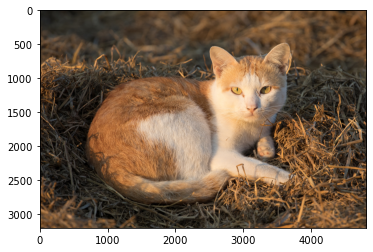

(3207, 4811, 3)


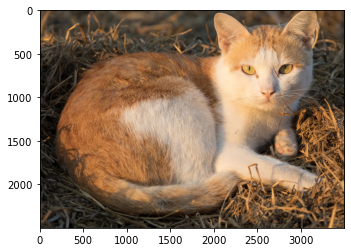

data type: <class 'numpy.ndarray'>, shape: (1250, 1750, 3)


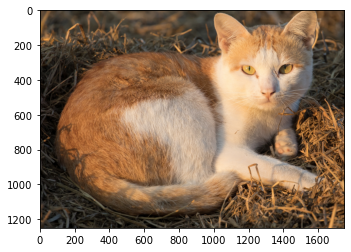

In [15]:
#페이지4
#4-1 : 고양이사진..
#고양이 사진 불러오기
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm

example_file=("https://upload.wikimedia.org/wikipedia/commons/4/4f/Felis_silvestris_catus_lying_on_rice_straw.jpg")
image = imread(example_file)
plt.imshow(image)
plt.show()

#이미지 확대
print(image.shape)
image2= image[500:3000, 500:4000]
plt.imshow(image2)
plt.show()

# resizing
image3 = resize(image2, (1250, 1750), mode='symmetric')
plt.imshow(image3)
print("data type: %s, shape: %s" % (type(image3), image3.shape))

#gray
plt.imshow(image3, cmap=cm.gray)
plt.show()

In [28]:
#4-2 : 위키피디아-다시해보기
import pandas as pd
import numpy as np

table_PA = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_smartphone_penetration')
df=table_PA[0]
print(df)


    Rank  Country/Region Total population Smartphone penetration  \
0      1  United Kingdom            67.0m                  82.9%   
1      2         Germany            82.4m                  79.9%   
2      3   United States           329.1m                  79.1%   
3      4          France            65.5m                  77.5%   
4      5           Spain            46.4m                  74.3%   
5      6     South Korea            51.3m                  70.4%   
6      7          Russia           143.9m                  66.3%   
7      8           Italy            59.2m                  60.8%   
8      9           China            1.42b                  59.9%   
9     10           Japan           126.9m                  57.2%   
10    11            Iran            82.8m                  54.8%   
11    12          Turkey            83.0m                  54.0%   
12    13          Mexico           132.3m                  49.5%   
13    14          Brazil           212.4m       

In [29]:
# int형변환은 pd.to_numeric(데이터프레임명['컬럼명'][i][])
for i in range(len(df)):
    if df['Total population'][i][-1] =='b':
        df['Total population'][i] = (10**9) * pd.to_numeric(df['Total population'][i][:-1])
    else:
        df['Total population'][i] = (10**6) * pd.to_numeric(df['Total population'][i][:-1])
print(df)

df['Smartphone penetration']=df['Smartphone penetration'].str[0:4]
df['Smartphone users']=df['Smartphone users'].str[:-1]
print(df)

    Rank  Country/Region Total population Smartphone penetration  \
0      1  United Kingdom       67000000.0                  82.9%   
1      2         Germany       82400000.0                  79.9%   
2      3   United States      329100000.0                  79.1%   
3      4          France       65500000.0                  77.5%   
4      5           Spain       46400000.0                  74.3%   
5      6     South Korea       51300000.0                  70.4%   
6      7          Russia      143900000.0                  66.3%   
7      8           Italy       59200000.0                  60.8%   
8      9           China     1420000000.0                  59.9%   
9     10           Japan      126900000.0                  57.2%   
10    11            Iran       82800000.0                  54.8%   
11    12          Turkey       83000000.0                  54.0%   
12    13          Mexico      132300000.0                  49.5%   
13    14          Brazil      212400000.0       

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_5172/4112126821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total population'][i] = (10**6) * pd.to_numeric(df['Total population'][i][:-1])
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_5172/4112126821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total population'][i] = (10**9) * pd.to_numeric(df['Total population'][i][:-1])


In [32]:
# int 형변환
df.info()
df[['Smartphone penetration', 'Smartphone users']]=df[['Smartphone penetration','Smartphone users']].apply(pd.to_numeric)
df.info()

# 부호 정정해주기
df['Smartphone penetration']=df['Smartphone penetration']*10**(-2)
df['Smartphone users']=df['Smartphone users']*10**6
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    20 non-null     int64  
 1   Country/Region          20 non-null     object 
 2   Total population        20 non-null     object 
 3   Smartphone penetration  20 non-null     float64
 4   Smartphone users        20 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    20 non-null     int64  
 1   Country/Region          20 non-null     object 
 2   Total population        20 non-null     object 
 3   Smartphone penetration  20 non-null     float64
 4   Smartphone users        20 non-null

In [41]:
#페이지5 : newspaper패키지
#5-1 : 한 사이트에 있는 여러 기사 스크랩

import newspaper
from newspaper import Article

# memoize_articles=False는 써줘도 되고 잘되면 안써줘도 됨!
site=newspaper.build("https://www.techspot.com/", memoize_articles=False)
site.article_urls()

['https://www.techspot.com/article/1965-anatomy-motherboard/',
 'https://www.techspot.com/article/2194-freesync-and-gsync/',
 'https://www.techspot.com/review/2191-geforce-rtx-3080-vs-radeon-6800-xt/',
 'https://www.techspot.com/article/2247-games-to-spike-adrenaline/',
 'https://www.techspot.com/news/90342-modded-4k-minecraft-looks-different-original-game.html',
 'https://www.techspot.com/article/2284-ransomware/',
 'https://www.techspot.com/news/90328-graphics-cards-prices-fall-sharply-second-month-row.html',
 'https://www.techspot.com/news/90362-smugglers-cling-film-256-cpus-their-bodies-chip.html',
 'https://www.techspot.com/review/2287-ryzen-5800x-vs-core-11700k-vs-ryzen-2700x/',
 'https://www.techspot.com/article/2247-games-to-spike-adrenaline/#allcomments',
 'https://www.techspot.com/news/90377-tesla-finally-launches-full-self-driving-beta-9.html',
 'https://www.techspot.com/news/90377-tesla-finally-launches-full-self-driving-beta-9.html#commentsOffset',
 'https://www.techspot.c

In [42]:
# 빈 인덱스를 생성해서 하나씩 채워넣음
allarticles = []
for i in range(len(site.article_urls())):
    article = Article(site.article_urls()[i])
    article.download()
    article.parse()
    allarticles.append(article)

In [44]:
# df라는 빈 데이터 프레임 생성
df=pd.DataFrame(columns=['Title', 'Authors', 'PubDate', 'URL', 'Text'])

# df데이터 프레임에 row를 넣어줌
for i in range(len(allarticles)):
    row = dict(zip(['Title', 'Authors', 'PubDate', 'URL', 'Text'], [allarticles[i].title, allarticles[i].authors, allarticles[i].publish_date, allarticles[i].url, allarticles[i].text]))
    # list가 데이터 프레임에 세로로 입력됨, row라는 값을 주면 가로로 입력됨.
    row_s = pd.Series(row)
    row_s.name=i
    df=df.append(row_s)
df

,Title,Authors,PubDate,URL,Text
0,Anatomy of a Motherboard,"[Nick Evanson, A Single Dimm Of Sdram. Image]",2020-01-06 06:08:00-05:00,https://www.techspot.com/article/1965-anatomy-...,"You might have a desktop PC at work, school, o..."
1,FreeSync and G-Sync: What You Need to Know,[Sami Haj-Assaad],2021-02-05 06:04:00-05:00,https://www.techspot.com/article/2194-freesync...,Adaptive sync display technologies from Nvidia...
2,GeForce RTX 3080 vs. Radeon RX 6800 XT,"[Steven Walton, For Reference, Here Are The Gp...",2021-02-01 06:11:00-05:00,https://www.techspot.com/review/2191-geforce-r...,Due to popular demand we're following up to ou...
3,10+ Games Guaranteed to Spike Your Adrenaline,"[Cal Jeffrey, Warning, This Youtuber Makes The...",2021-07-11 06:00:00-05:00,https://www.techspot.com/article/2247-games-to...,"A while back, we presented a list of our favor..."
4,Modded 4K Minecraft looks very different,"[Rob Thubron, It'S Minecraft, But Not As You K...",2021-07-08 05:15:00-05:00,https://www.techspot.com/news/90342-modded-4k-...,In brief: Despite being the best-selling game ...
...,...,...,...,...,...
348,Symantec Norton AntiVirus Definition Update Ju...,[],None,https://www.techspot.com/downloads/150-symante...,Norton AntiVirus defends your PC against detec...
349,How We Test: CPU Gaming Benchmarks,[Steven Walton],2018-11-08 00:06:00-05:00,https://www.techspot.com/article/1637-how-we-t...,This a topic that’s often raised when we do ou...
350,How Many FPS Do You Need?,[Tim Schiesser],2018-12-27 00:09:00-05:00,https://www.techspot.com/article/1668-how-many...,Today we’re addressing one of the most frequen...
351,How to Calibrate Your Monitor,[Tim Schiesser],2020-07-10 06:18:00-05:00,https://www.techspot.com/guides/2055-how-to-mo...,Monitor calibration is very important to a cre...


In [46]:
#5-2
import newspaper
from newspaper import Article

article=Article("https://www.etnews.com/20210702000137?mc=em_001_00001", language='ko')
article.download()
article.parse()
print(article.text)

토스뱅크, 거물급 사외이사 물색 나서

이달 개발자 대거 채용·파격 대우 제시

카뱅도 공격적 인력 확보로 몸집 키워

임직원 1000명 돌파...IT가 40% 차지

3강 구도로 개편되는 인터넷전문은행이 공격적으로 정보기술(IT) 전문인력 확보 전쟁을 시작했다. 그동안 상대적으로 보조 역할에만 그쳐 있던 IT 인력이 비대면 디지털 채널이 뜨면서 업무 핵심 그룹으로 떠올랐다. 몸값도 덩달아 치솟고 있다.



9월 출범을 앞둔 토스뱅크는 디지털에 특화한 '거물급' 사외이사 영입을 위한 물밑작업에 들어갔다. 기술력을 앞세운 토스뱅크는 IT 이해도가 높은 사외이사를 물색하고 있는 것으로 알려졌다. 토스뱅크 관계자는 4일 “이달 열릴 주총에서 사외이사를 선임할 계획”이라면서 “빅샷 영입이 예상된다”고 말했다.



이보다 앞서 토스뱅크는 기존 금융사에서 업무집행 책임자를 끌어오기도 했다. 지난달 양수지 전 에이비엘생명보험 준법감시인과 최승락 전 스탠다드차타드 싱가포르 글로벌 매니저가 업무집행 책임자로 선임됐다. 양 책임자는 준법감시인, 최 책임자는 금융소비자보호최고책임자(CCO) 업무를 각각 맡았다.



이달에는 개발자를 대거 채용할 계획이다. 채용 분야는 기술 분야의 제품기획과 디자인, 엔지니어링, 보안·인프라, 코어뱅킹, 데이터 등이다. 직전 회사의 최대 1.5배에 이르는 연봉 등 파격적인 대우를 제시했다. 또 토스뱅크는 출범 전 입사자에게는 주식매수선택권(스톡옵션)과 이직에 따른 보너스(사이닝 보너스)도 제공할 방침이다.



카카오뱅크도 공격적으로 전문인력 확보에 들어가면서 몸집을 키우고 있다. 카카오뱅크 임직원 수는 지난달 말 기준 1023명으로, 지난 2017년 7월 출범 당시 300여명에서 4년 만에 3배 넘게 증가했다. 전체 임직원 가운데 약 40%는 IT 전문인력이다. 카카오뱅크는 2018년부터 경력 개발자를 공개채용하고 있다. 성장 가능성과 수평문화에 힘입어 매년 많은 개발자가 몰리는 것으로 평가받고 있다. 카카오뱅크는 “3년 동안 500억원 규

In [47]:
print(article.title)
print(article.publish_date)

datetime.datetime(2021, 7, 2, 15, 1, tzinfo=tzoffset(None, 32400))

In [48]:
#페이지6-->35p참고해서 다시해보기
#6-1 : BBC뉴스 헤드라인 스크랩
import urllib.request as ure
from bs4 import BeautifulSoup as bs

news='https://www.bbc.com/'
soup=bs(ure.urlopen(news).read(), 'html.parser')

#공통점 찾아야함, 링크를 hero에 저장
hero = soup.find_all('div', {"data-bbc-container":"hero"})

In [53]:
rows = []
for i in range(len(hero)):
    # 타이틀, url, text 추출
    # 타이틀 가져오기
    herotitle = hero[i].get('data-bbc-title')
    # url 가져오기
    herourl = "https://www.bbc.com" + hero[i].find('a').get('href')
    # 가져온 url을 html로 해석함
    soup2 = bs(ure.urlopen(herourl).read(),'html.parser')
    # text 추출
    txt=""
    for j in soup2.find_all('p'):
        txt=txt+j.text
    rows.append({'Title': herotitle, 'URL':herourl, 'Text':txt})

In [55]:
import pandas as pd
df = pd.DataFrame(rows, columns=['Title', 'URL', 'Text'])

In [56]:
df

,Title,URL,Text
0,Wildfires rage as heatwave sweeps western US,https://www.bbc.com/news/world-us-canada-57794263,NaN
1,Queen and PM wish England well as Euro final l...,https://www.bbc.com/news/uk-57789451,NaN
2,Wimbledon: Djokovic v Berrettini build-up - TV...,https://www.bbc.com/sport/live/tennis/50976626,NaN
3,Football-mad Italians gear up for big night,https://www.bbc.com/news/world-europe-57783267,NaN
4,Euro 2020 final build-up - plus watch Ukraine ...,https://www.bbc.com/sport/live/football/50941458,NaN
